In [1]:
#Importing main module
from cosmicfishpie.fishermatrix.cosmicfish import FisherMatrix
import numpy as np
import cosmicfishpie.configs.config as cfg

# Choose input parameters

In [2]:
#Define the observables you are interested in
observables = [['WL']]

runRootName = "LCDM_5pcamb_HMc"
#Input options for CosmicFish (global options)
options = {'accuracy': 1,
           #'outroot': 'LCDM_camb_int-full-HMc2020',
           'results_dir': 'results/',
           'derivatives': '3PT',
           'nonlinear': True,
           'feedback': 2,
           'survey_name': 'Euclid',
           'specs_dir' : '../survey_specifications/',
           'survey_name_photo': 'Euclid-Photometric-'+'ISTF-Pessimistic',
           #'survey_name_spectro': 'Euclid-Spectroscopic-'+'ISTF-Pessimistic',
           'cosmo_model' : 'LCDM',
           'code': 'camb',
           'camb_config_yaml':'../boltzmann_yaml_files/camb/default.yaml'}

#Internally Cosmicfish converts these Parameters to the coresponding parameters in CAMB or CLASS 
fiducial = {
            "Omegam":0.3186,
            'omch2':0.121259,
            "ombh2":0.0227,
            "Omegab": 0.0491989,
            "w0":-1.0,
            "wa":0.,
            "h":0.6737,
            "ns":0.966,
            "logAs":3.04,
            "sigma8" : 0.81,
            "mnu":0.06,
            "Neff":3.043
            }

#Intrinsic alignment modeling.
IApars = {'IA_model': 'eNLA',
          'AIA': 0.16,
          'betaIA': 0.0,
          'etaIA': 1.66}
#Parameters to be varied and analyzed and their percentage variation for numerical derivatives
# IA params and photometric galaxy bias are added automatically to these parameters
freepars = {
            #'omch2': 0.01,
            #'ombh2': 0.01,
            #'logAs' : 0.01,
            #'w0': 0.01,
            #'wa': 0.01,
            'Omegab':0.01,
            'h': 0.01,
            'ns': 0.01,
            'sigma8': 0.01,
            'Omegam':0.01,
            }

In [3]:
specsdics = [
    {'name': 'lmax3000',
     'lmax_WL' :  3000
     },
    {'name': 'lmax750',
     'lmax_WL' :  750
     },
    {'name': 'lmax1500',
     'lmax_WL' :  1500
     },
    {'name': 'lmax5000',
     'lmax_WL' :  5000
     }
]

In [4]:
runFishers = False
runCosmo = False

In [5]:
FishersList = []
cosmoFM = dict()
for obse in observables:
    for specd in specsdics:
        options['outroot'] = runRootName
        options['outroot'] = options['outroot']+"-"+specd.get('name')
        print("-->running: ", options['outroot'])
        print("Dic to add: ")
        print(specd)
        if runCosmo:
            cosmoFM[options['outroot']] = FisherMatrix(fiducialpars=fiducial, 
                                freepars=freepars, 
                                options=options,
                                IApars=IApars,
                                observables=obse,
                                cosmoModel=options['cosmo_model'],
                                surveyName=options['survey_name'],
                                specifications=specd
                                )
        if runFishers:
            FishersList.append(cosmoFM[options['outroot']].compute())

-->running:  LCDM_5pcamb_HMc-lmax3000
Dic to add: 
{'name': 'lmax3000', 'lmax_WL': 3000}
-->running:  LCDM_5pcamb_HMc-lmax750
Dic to add: 
{'name': 'lmax750', 'lmax_WL': 750}
-->running:  LCDM_5pcamb_HMc-lmax1500
Dic to add: 
{'name': 'lmax1500', 'lmax_WL': 1500}
-->running:  LCDM_5pcamb_HMc-lmax5000
Dic to add: 
{'name': 'lmax5000', 'lmax_WL': 5000}


In [6]:
#cfg.fiducialcosmo.cambcosmopars

# Plot Fishers

In [7]:
import glob
from cosmicfishpie.analysis import fisher_matrix as fm
from cosmicfishpie.analysis import fisher_operations as fo
from cosmicfishpie.analysis import fisher_plotting as fpp
from cosmicfishpie.analysis import colors
import numpy as np

## Fisher Matrices ISTF pars

### Loading Fisher Matrices from files

In [8]:
file_list = glob.glob('./results/CosmicFish_v1.0*LCDM*5pcamb*fishermatrix.txt')
file_list.sort()
for fi, ff in enumerate(file_list):
    print(f"ii: {fi}, file name: {ff}")

ii: 0, file name: ./results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax1500_WL_fishermatrix.txt
ii: 1, file name: ./results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax3000_WL_fishermatrix.txt
ii: 2, file name: ./results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax5000_WL_fishermatrix.txt
ii: 3, file name: ./results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax750_WL_fishermatrix.txt


In [9]:
file_list_filter = [file_list[ii] for ii in [3,0,1]]
print(file_list_filter)
fisher_list = [fm.fisher_matrix(file_name=ff) for ff in file_list_filter]

['./results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax750_WL_fishermatrix.txt', './results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax1500_WL_fishermatrix.txt', './results/CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax3000_WL_fishermatrix.txt']


In [10]:
Fishes = fisher_list
#plotFishnames = [fish.name for fish in fisher_list]
plotFishnames = [
    'WL LCDM_5par HMc elmx = 750',
    'WL LCDM_5par HMc elmx = 1500',
    'WL LCDM_5par HMc elmx = 3000' #,
    #'WL LCDM_2par HMc elmx = 5000'
    ]
plotFishnames

['WL LCDM_5par HMc elmx = 750',
 'WL LCDM_5par HMc elmx = 1500',
 'WL LCDM_5par HMc elmx = 3000']

In [11]:
fishermatBBN = np.array([[(1/0.00038)**2]])
parnamesBBN = ['ombh2']
fiduBBN=[fiducial['ombh2']]
fisherBBN = fm.fisher_matrix(fisher_matrix=fishermatBBN, param_names=parnamesBBN,
                             fiducial=fiduBBN, param_names_latex=parnamesBBN)

In [12]:
fisherBBN.get_confidence_bounds()

array([0.00038001])

In [13]:
fisher_list[0].get_param_names()

['Omegab', 'h', 'ns', 'sigma8', 'Omegam', 'AIA', 'betaIA', 'etaIA']

In [14]:
Jacovec = np.array([2*fiducial['h']*fiducial['Omegab'], fiducial['h']**2])
Jacovec

array([0.0662906 , 0.45387169])

In [15]:
fisherMatBBN_big = Jacovec[:,np.newaxis] @ fishermatBBN @ Jacovec[np.newaxis,:]
fisherMatBBN_big

array([[  30432.4332731 ,  208361.67369687],
       [ 208361.67369687, 1426589.41124277]])

In [16]:
parnamesBBN_big = ['h', 'Omegab']
fiduBBN_big = [fiducial['h'], fiducial['Omegab']]
print(fiduBBN_big)
fisherBBN_big = fm.fisher_matrix(fisher_matrix=fisherMatBBN_big, param_names=parnamesBBN_big,
                             fiducial=fiduBBN_big, param_names_latex=parnamesBBN_big)

[0.6737, 0.0491989]


In [17]:
Fishes_BBNpri = []
Fishes_Nopri = []
choosebase='big'  #big base is big Omegas, small is small omegas like cloe
#parstomarg = ['ombh2','logAs']
parstomarg = ['Omegab','sigma8']
for ii, fish in enumerate(Fishes):
    print("----")
    print("Old Fisher Name: ", fish.name)
    fish.name = plotFishnames[ii]
    print("New Fisher Name: ", fish.name)
    fish = fo.eliminate_parameters(fish, ['betaIA'])
    basename = (fish.name).replace("_reduced","")
    fish.name = basename+" NOpri"
    Fishes_Nopri.append(fish)
    print("Add BBN prior")
    if choosebase=='big':
        fishpri  = fish + fisherBBN_big
    elif choosebase=='small':
        fishpri  = fish + fisherBBN
    fishpri.name  = basename+" BBNpri"
    Fishes_BBNpri.append(fishpri)
for fish in Fishes_Nopri+Fishes_BBNpri:
    print("----")
    print(fish.name)
    sigmas = fish.get_confidence_bounds()
    fidus = fish.get_param_fiducial()
    parnames = fish.get_param_names()
    fiww = fo.marginalise(fish, parstomarg)
    deFoM = np.sqrt(fiww.determinant())
    print("Fisher FoM: ", deFoM)
    for ii, par in enumerate(parnames):
        print("Parameter {:s},  fiducial: {:.3f}, 1-sigma error: {:.4f}, percent error: {:.1f}%".format(
            par, fidus[ii], abs(sigmas[ii]), abs(100*sigmas[ii]/fidus[ii])))

----
Old Fisher Name:  CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax750_WL_fishermatrix
New Fisher Name:  WL LCDM_5par HMc elmx = 750
Add BBN prior
Warning in addition: parameter Omegab has different fiducials: 0.049199 and 0.0491989
Accepted relative tolerance: 0.0005
----
Old Fisher Name:  CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax1500_WL_fishermatrix
New Fisher Name:  WL LCDM_5par HMc elmx = 1500
Add BBN prior
Warning in addition: parameter Omegab has different fiducials: 0.049199 and 0.0491989
Accepted relative tolerance: 0.0005
----
Old Fisher Name:  CosmicFish_v1.0_LCDM_5pcamb_HMc-lmax3000_WL_fishermatrix
New Fisher Name:  WL LCDM_5par HMc elmx = 3000
Add BBN prior
Warning in addition: parameter Omegab has different fiducials: 0.049199 and 0.0491989
Accepted relative tolerance: 0.0005
----
WL LCDM_5par HMc elmx = 750 NOpri
Fisher FoM:  3926.1003496716326
Parameter Omegab,  fiducial: 0.049, 1-sigma error: 0.0246, percent error: 49.9%
Parameter h,  fiducial: 0.674, 1-sigma error: 0.1719, percent 

In [18]:
Fishes_Nopri[2].name

'WL LCDM_5par HMc elmx = 3000 NOpri'

In [19]:
Fishes_Nopri[2].get_param_names()

['Omegab', 'h', 'ns', 'sigma8', 'Omegam', 'AIA', 'etaIA']

In [20]:
Fishes_Nopri[2].protect_degenerate()  #used to inform MP WL run

In [21]:
print(Fishes_Nopri[2].fisher_matrix_inv)  #used to inform MP WL run

[[ 4.52189622e-04  2.57814170e-03 -5.15584403e-04 -3.37735302e-05
   2.17915175e-05 -9.90845445e-07  9.90976164e-05]
 [ 2.57814170e-03  1.57542560e-02 -3.54006084e-03 -1.39920410e-04
   7.95459954e-05 -2.56407003e-04  3.16004470e-03]
 [-5.15584403e-04 -3.54006084e-03  9.72043662e-04  1.73046970e-05
  -1.05638339e-05  1.31008647e-04 -1.37689260e-03]
 [-3.37735302e-05 -1.39920410e-04  1.73046970e-05  3.35764738e-05
  -2.56226246e-05 -6.07407844e-05  4.11221822e-04]
 [ 2.17915175e-05  7.95459954e-05 -1.05638339e-05 -2.56226246e-05
   2.02798638e-05  4.73600640e-05 -3.24253013e-04]
 [-9.90845445e-07 -2.56407003e-04  1.31008647e-04 -6.07407844e-05
   4.73600640e-05  5.99791455e-04 -6.22619157e-03]
 [ 9.90976164e-05  3.16004470e-03 -1.37689260e-03  4.11221822e-04
  -3.24253013e-04 -6.22619157e-03  7.61872824e-02]]


In [22]:
invmat = (Fishes_Nopri[2].fisher_matrix_inv)  #used to inform MP WL run

In [23]:
np.linalg.inv(0.5*(np.linalg.inv(invmat)) + 0.5*(np.linalg.inv(invmat).T))

array([[ 4.52189622e-04,  2.57814170e-03, -5.15584403e-04,
        -3.37735302e-05,  2.17915175e-05, -9.90845445e-07,
         9.90976164e-05],
       [ 2.57814170e-03,  1.57542560e-02, -3.54006084e-03,
        -1.39920410e-04,  7.95459954e-05, -2.56407003e-04,
         3.16004470e-03],
       [-5.15584403e-04, -3.54006084e-03,  9.72043662e-04,
         1.73046970e-05, -1.05638339e-05,  1.31008647e-04,
        -1.37689260e-03],
       [-3.37735302e-05, -1.39920410e-04,  1.73046970e-05,
         3.35764738e-05, -2.56226246e-05, -6.07407844e-05,
         4.11221822e-04],
       [ 2.17915175e-05,  7.95459954e-05, -1.05638339e-05,
        -2.56226246e-05,  2.02798638e-05,  4.73600640e-05,
        -3.24253013e-04],
       [-9.90845445e-07, -2.56407003e-04,  1.31008647e-04,
        -6.07407844e-05,  4.73600640e-05,  5.99791455e-04,
        -6.22619157e-03],
       [ 9.90976164e-05,  3.16004470e-03, -1.37689260e-03,
         4.11221822e-04, -3.24253013e-04, -6.22619157e-03,
         7.6187282

In [24]:
np.savetxt("./results/CF_invmat_WL3000_bigpars.txt", Fishes_Nopri[2].fisher_matrix_inv)  #used to inform MP WL run

In [25]:
cosmowlpars = Fishes_Nopri[0].get_param_names()
cosmowlpars

['Omegab', 'h', 'ns', 'sigma8', 'Omegam', 'AIA', 'etaIA']

### Plotting the Fisher matrix

In [26]:
colorlist = [colors.nice_colors(ii) for ii in range(8)]
colorlist

[(0.796078431372549, 0.058823529411764705, 0.1568627450980392),
 (1.0, 0.6470588235294118, 0.0),
 (0.16470588235294117, 0.1803921568627451, 0.5450980392156862),
 (0.0, 0.6, 0.8),
 (0.0, 0.8666666666666667, 0.20392156862745098),
 (0.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.796078431372549, 0.058823529411764705, 0.1568627450980392)]

In [27]:
Fishes_all = Fishes_Nopri+Fishes_BBNpri
for ii, ff in enumerate(Fishes_all):
    print(f"ii = {ii} ;; name = {ff.name}")

ii = 0 ;; name = WL LCDM_5par HMc elmx = 750 NOpri
ii = 1 ;; name = WL LCDM_5par HMc elmx = 1500 NOpri
ii = 2 ;; name = WL LCDM_5par HMc elmx = 3000 NOpri
ii = 3 ;; name = WL LCDM_5par HMc elmx = 750 BBNpri
ii = 4 ;; name = WL LCDM_5par HMc elmx = 1500 BBNpri
ii = 5 ;; name = WL LCDM_5par HMc elmx = 3000 BBNpri


./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 NOpri
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 3000 NOpri
Entering plotting routine
{'Omegab': [-0.017856124954191997, 0.11625412495419199], 'h': [0.2623187043009586, 1.0850812956990414], 'ns': [0.8448926530718748, 1.0871073469281252], 'sigma8': [0.7869919026186567, 0.8330080973813434], 'Omegam': [0.30080004574145647, 0.3363999542585435], 'AIA': [0.0748524373602366, 0.2451475626397634], 'etaIA': [0.7396330270194357, 2.5803669729805643]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


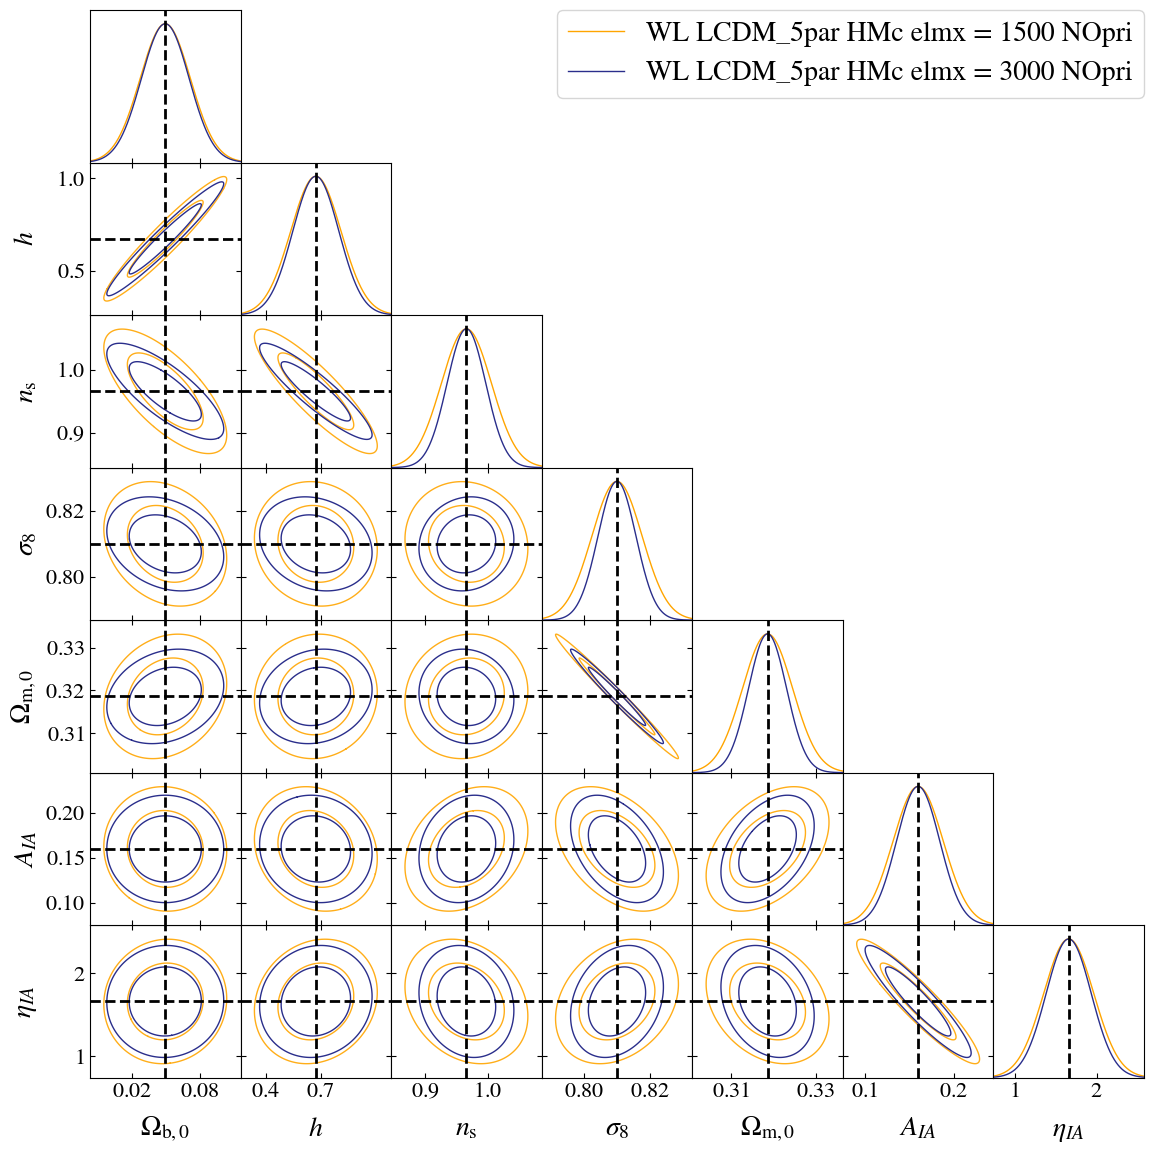

In [28]:
chooseind = [1,2]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmowlpars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_WL-Nopri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 BBNpri
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 3000 BBNpri
Entering plotting routine
{'Omegab': [0.03923512287627639, 0.05916287712372361], 'h': [0.6056021940403338, 0.7417978059596662], 'ns': [0.8924219832689445, 1.0395780167310553], 'sigma8': [0.7873303335651064, 0.8326696664348937], 'Omegam': [0.3009642049037994, 0.3362357950962006], 'AIA': [0.07525030451686204, 0.24474969548313796], 'etaIA': [0.7438485685761195, 2.5761514314238805]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


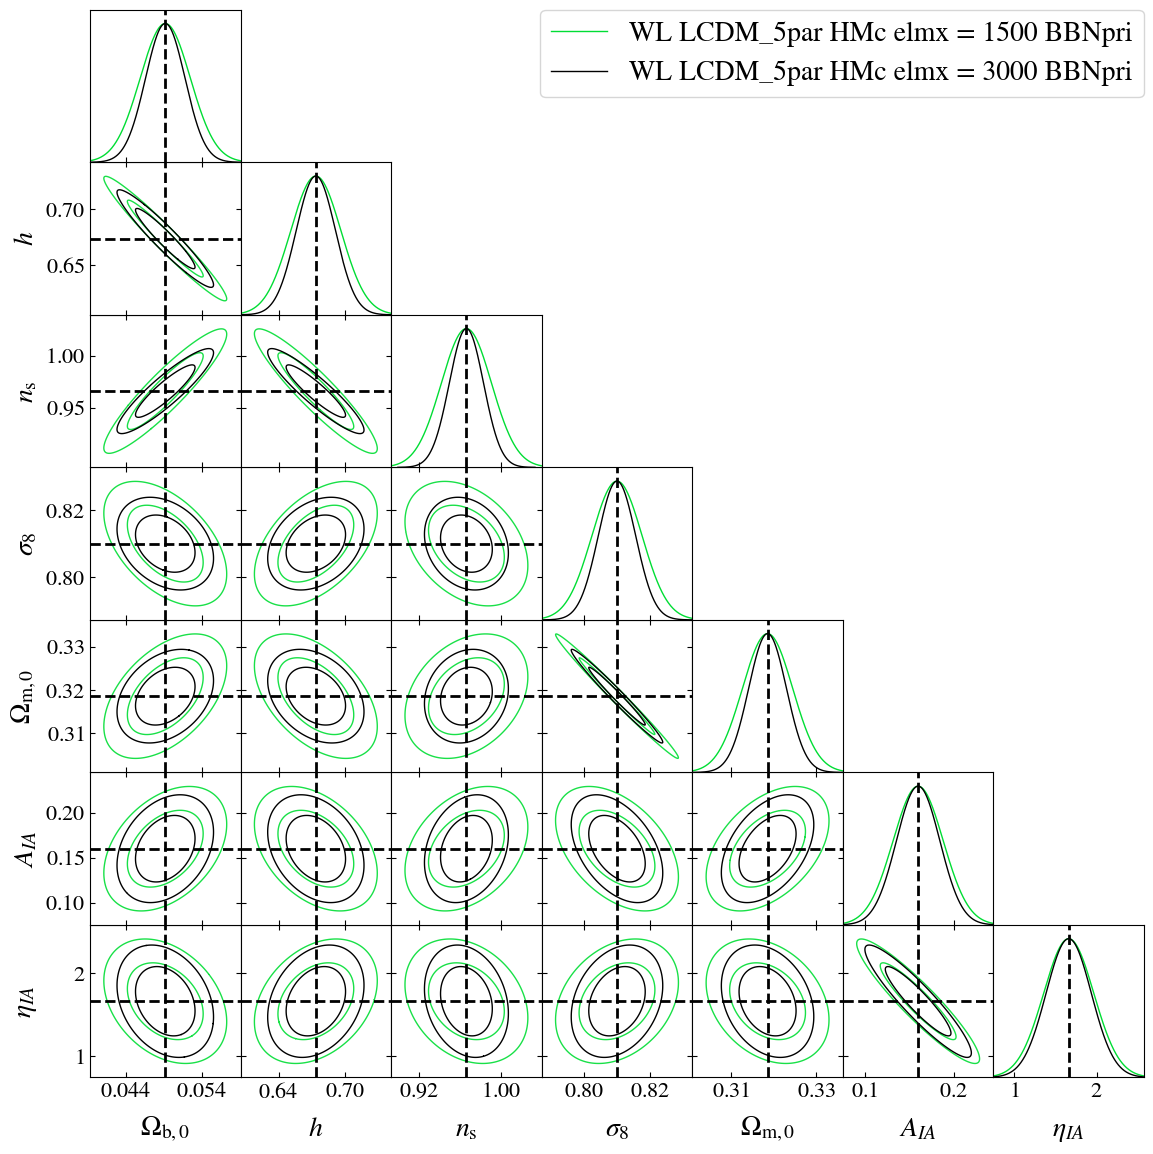

In [29]:
chooseind = [4,5]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmowlpars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_WL-BBNpri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

In [30]:
fisherBBN_big.protect_degenerate()

In [31]:
fisherBBN_big.fisher_matrix

array([[  30432.43341576,  208361.67367604],
       [ 208361.67367604, 1426589.41124581]])

In [32]:
np.linalg.inv((fisherBBN_big.fisher_matrix))

array([[6719.96301283, -981.48964892],
       [-981.48964892,  143.35226754]])

./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 NOpri
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 BBNpri
Entering plotting routine
{'Omegab': [-0.017856124954191997, 0.11625412495419199], 'h': [0.2623187043009586, 1.0850812956990414], 'ns': [0.8448926530718748, 1.0871073469281252], 'sigma8': [0.7869919026186567, 0.8330080973813434], 'Omegam': [0.30080004574145647, 0.3363999542585435], 'AIA': [0.0748524373602366, 0.2451475626397634], 'etaIA': [0.7396330270194357, 2.5803669729805643]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


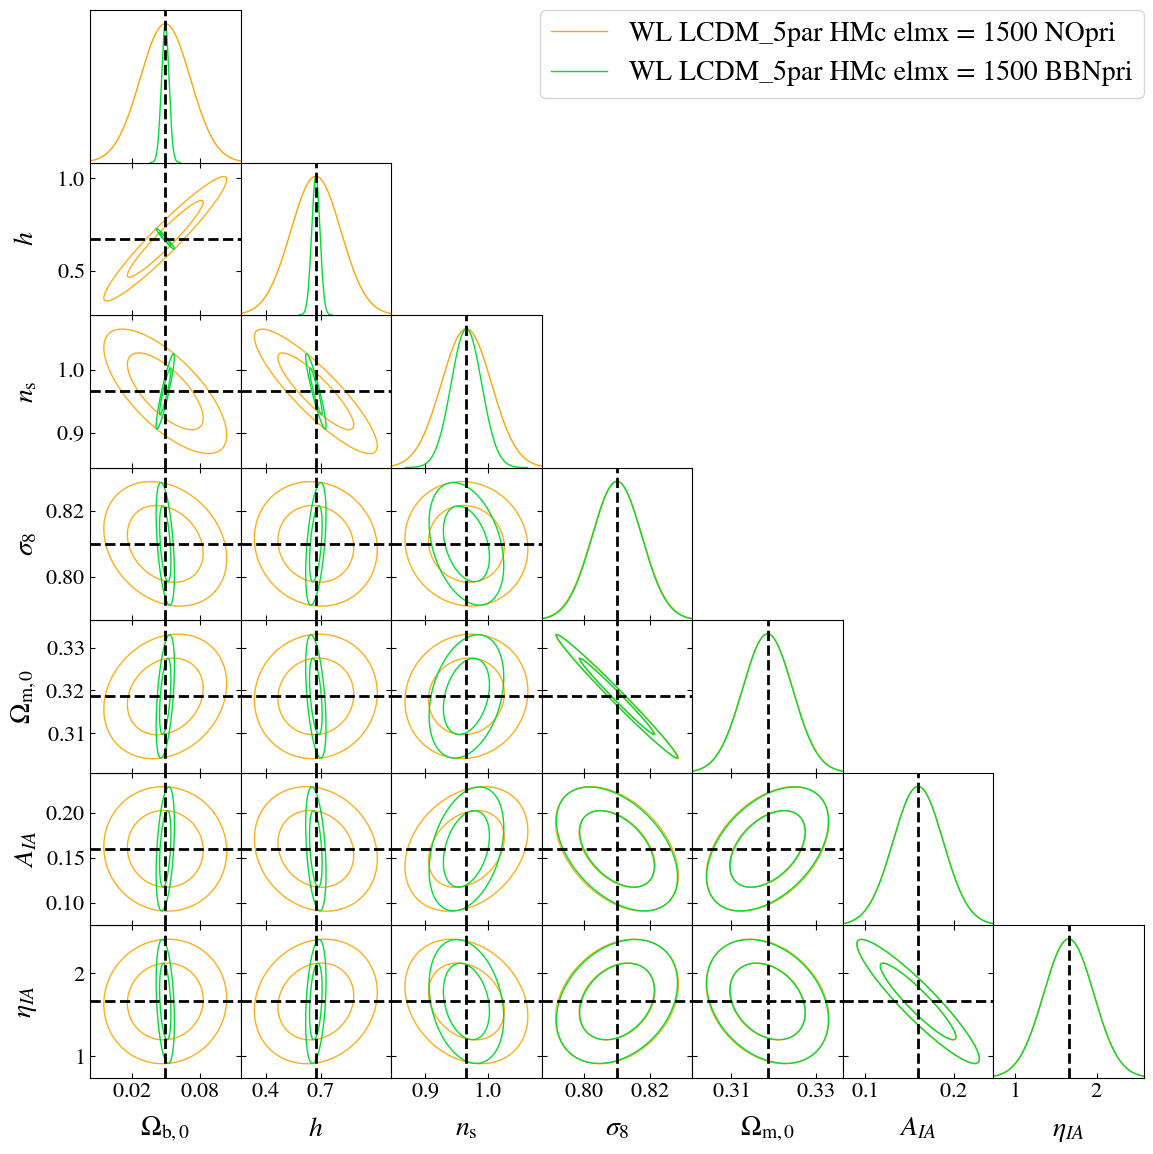

In [33]:
chooseind = [1,4]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmowlpars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_WL-BBNNopri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

In [34]:
#fish_plotter.compare_errors({'colors': colorlist, 'ncol_legend':1, "y_lim":[-100,100]})

## Fisher Matrices CLOE pars

### Loading Fisher Matrices

In [35]:
file_list = glob.glob('./results/CosmicFish_v1.0*LCDM*camb*small*fishermatrix.txt')
file_list.sort()
for fi, ff in enumerate(file_list):
    print(f"ii: {fi}, file name: {ff}")

ii: 0, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax1500_WL_fishermatrix.txt
ii: 1, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax3000_WL_fishermatrix.txt
ii: 2, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax5000_WL_fishermatrix.txt
ii: 3, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax750_WL_fishermatrix.txt
ii: 4, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020_WL_fishermatrix.txt
ii: 5, file name: ./results/CosmicFish_v1.0_LCDM_camb_int-small_WL_fishermatrix.txt


In [36]:
file_list_filter = [file_list[ii] for ii in [3,0,1]]
print(file_list_filter)
fisher_list = [fm.fisher_matrix(file_name=ff) for ff in file_list_filter]

['./results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax750_WL_fishermatrix.txt', './results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax1500_WL_fishermatrix.txt', './results/CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax3000_WL_fishermatrix.txt']


In [37]:
Fishes = fisher_list
#plotFishnames = [fish.name for fish in fisher_list]
plotFishnames = [
    'WL LCDM_5par HMc elmx = 750',
    'WL LCDM_5par HMc elmx = 1500',
    'WL LCDM_5par HMc elmx = 3000' #,
    #'WL LCDM_2par HMc elmx = 5000'
    ]
plotFishnames

['WL LCDM_5par HMc elmx = 750',
 'WL LCDM_5par HMc elmx = 1500',
 'WL LCDM_5par HMc elmx = 3000']

In [38]:
fishermatBBN = np.array([[(1/0.00038)**2]])
parnamesBBN = ['ombh2']
fiduBBN=[0.0227]
fisherBBN = fm.fisher_matrix(fisher_matrix=fishermatBBN, param_names=parnamesBBN,
                             fiducial=fiduBBN, param_names_latex=parnamesBBN)

In [39]:
fisherBBN.get_confidence_bounds()

array([0.00038001])

In [40]:
fisher_list[0].get_param_names()

['omch2', 'ombh2', 'logAs', 'h', 'ns', 'AIA', 'betaIA', 'etaIA']

In [41]:
Fishes_BBNpri = []
Fishes_Nopri = []
choosebase='small'  #big base is big Omegas, small is small omegas like cloe
parstomarg = ['ombh2','logAs']
#parstomarg = ['Omegab','sigma8']
for ii, fish in enumerate(Fishes):
    print("----")
    print("Old Fisher Name: ", fish.name)
    fish.name = plotFishnames[ii]
    print("New Fisher Name: ", fish.name)
    fish = fo.eliminate_parameters(fish, ['betaIA'])
    basename = (fish.name).replace("_reduced","")
    fish.name = basename+" NOpri"
    Fishes_Nopri.append(fish)
    print("Add BBN prior")
    if choosebase=='big':
        fishpri  = fish + fisherBBN_big
    elif choosebase=='small':
        fishpri  = fish + fisherBBN
    fishpri.name  = basename+" BBNpri"
    Fishes_BBNpri.append(fishpri)
for fish in Fishes_Nopri+Fishes_BBNpri:
    print("----")
    print(fish.name)
    sigmas = fish.get_confidence_bounds()
    fidus = fish.get_param_fiducial()
    parnames = fish.get_param_names()
    fiww = fo.marginalise(fish, parstomarg)
    deFoM = np.sqrt(fiww.determinant())
    print("Fisher FoM: ", deFoM)
    for ii, par in enumerate(parnames):
        print("Parameter {:s},  fiducial: {:.3f}, 1-sigma error: {:.4f}, percent error: {:.1f}%".format(
            par, fidus[ii], abs(sigmas[ii]), abs(100*sigmas[ii]/fidus[ii])))

----
Old Fisher Name:  CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax750_WL_fishermatrix
New Fisher Name:  WL LCDM_5par HMc elmx = 750
Add BBN prior
----
Old Fisher Name:  CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax1500_WL_fishermatrix
New Fisher Name:  WL LCDM_5par HMc elmx = 1500
Add BBN prior
----
Old Fisher Name:  CosmicFish_v1.0_LCDM_camb_int-small-HMc2020-lmax3000_WL_fishermatrix
New Fisher Name:  WL LCDM_5par HMc elmx = 3000
Add BBN prior
----
WL LCDM_5par HMc elmx = 750 NOpri
Fisher FoM:  429.5872466591031
Parameter omch2,  fiducial: 0.121, 1-sigma error: 0.0480, percent error: 39.6%
Parameter ombh2,  fiducial: 0.023, 1-sigma error: 0.0210, percent error: 92.7%
Parameter logAs,  fiducial: 3.040, 1-sigma error: 0.2567, percent error: 8.4%
Parameter h,  fiducial: 0.674, 1-sigma error: 0.1591, percent error: 23.6%
Parameter ns,  fiducial: 0.966, 1-sigma error: 0.0599, percent error: 6.2%
Parameter AIA,  fiducial: 0.160, 1-sigma error: 0.0338, percent error: 21.1%
Parameter 

In [42]:
cosmowlpars = Fishes_Nopri[0].get_param_names()
cosmowlpars

['omch2', 'ombh2', 'logAs', 'h', 'ns', 'AIA', 'etaIA']

### Plotting the Fisher matrix CLOE pars

In [43]:
colorlist = [colors.nice_colors(ii) for ii in range(8)]
colorlist

[(0.796078431372549, 0.058823529411764705, 0.1568627450980392),
 (1.0, 0.6470588235294118, 0.0),
 (0.16470588235294117, 0.1803921568627451, 0.5450980392156862),
 (0.0, 0.6, 0.8),
 (0.0, 0.8666666666666667, 0.20392156862745098),
 (0.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.796078431372549, 0.058823529411764705, 0.1568627450980392)]

In [44]:
Fishes_all = Fishes_Nopri+Fishes_BBNpri
for ii, ff in enumerate(Fishes_all):
    print(f"ii = {ii} ;; name = {ff.name}")

ii = 0 ;; name = WL LCDM_5par HMc elmx = 750 NOpri
ii = 1 ;; name = WL LCDM_5par HMc elmx = 1500 NOpri
ii = 2 ;; name = WL LCDM_5par HMc elmx = 3000 NOpri
ii = 3 ;; name = WL LCDM_5par HMc elmx = 750 BBNpri
ii = 4 ;; name = WL LCDM_5par HMc elmx = 1500 BBNpri
ii = 5 ;; name = WL LCDM_5par HMc elmx = 3000 BBNpri


./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 NOpri
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 3000 NOpri
Entering plotting routine
{'omch2': [0.006137473268851806, 0.2363805267311482], 'ombh2': [-0.03259182092862574, 0.07799182092862575], 'logAs': [2.4663387362221085, 3.6136612637778915], 'h': [0.28319726665345707, 1.064202733346543], 'ns': [0.8514650838799218, 1.0805349161200781], 'AIA': [0.0748016016999622, 0.2451983983000378], 'etaIA': [0.739842123000811, 2.5801578769991886]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


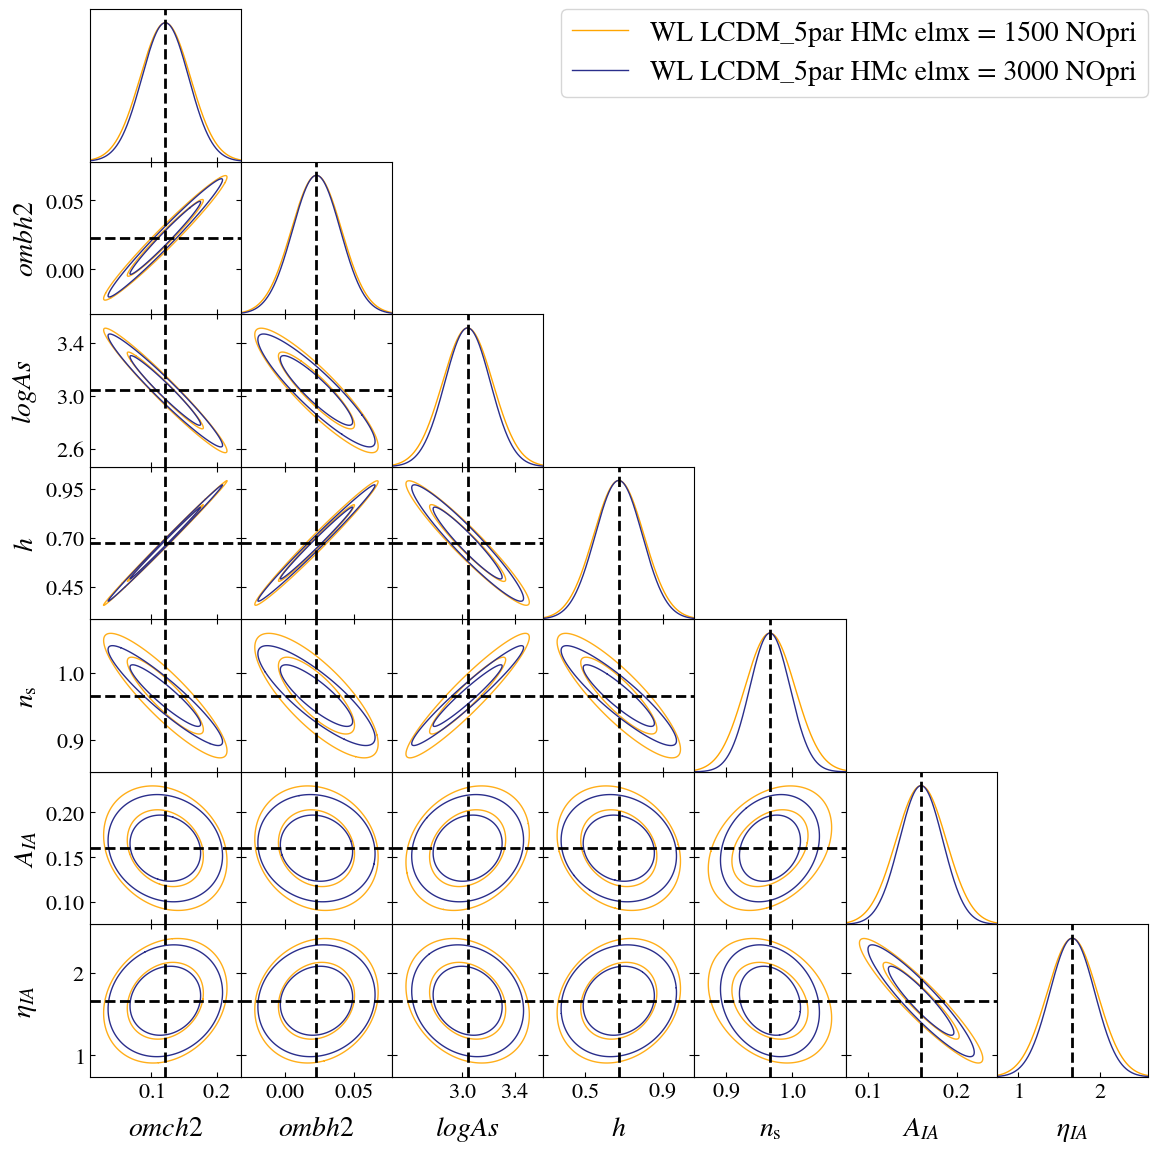

In [45]:
chooseind = [1,2]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmowlpars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_WL-Nopri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 BBNpri
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 3000 BBNpri
Entering plotting routine
{'omch2': [0.0955700158823709, 0.1469479841176291], 'ombh2': [0.021560217490583813, 0.02383978250941619], 'logAs': [2.7861768815204235, 3.2938231184795765], 'h': [0.6070682337011553, 0.7403317662988447], 'ns': [0.8933419245701432, 1.0386580754298567], 'AIA': [0.0756819742530744, 0.24431802574692563], 'etaIA': [0.7490321792970425, 2.5709678207029576]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


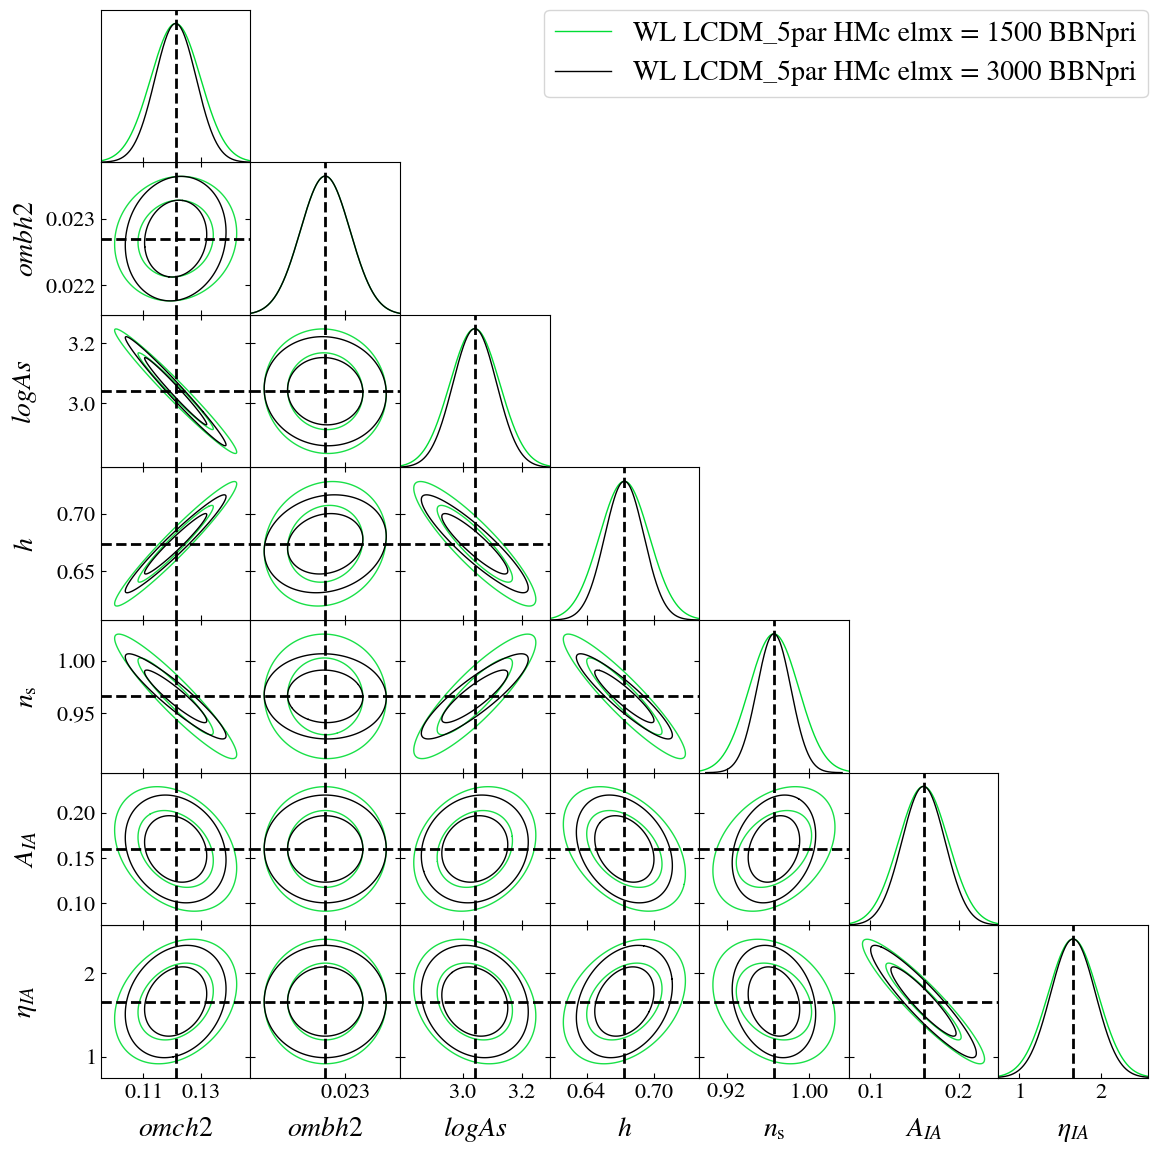

In [46]:
chooseind = [4,5]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmowlpars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_WL-BBNpri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

./plots  exists already
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 NOpri
Fisher matrix loaded, label name:  WL LCDM_5par HMc elmx = 1500 BBNpri
Entering plotting routine
{'omch2': [0.006137473268851806, 0.2363805267311482], 'ombh2': [-0.03259182092862574, 0.07799182092862575], 'logAs': [2.4663387362221085, 3.6136612637778915], 'h': [0.28319726665345707, 1.064202733346543], 'ns': [0.8514650838799218, 1.0805349161200781], 'AIA': [0.0748016016999622, 0.2451983983000378], 'etaIA': [0.739842123000811, 2.5801578769991886]}


/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:258: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


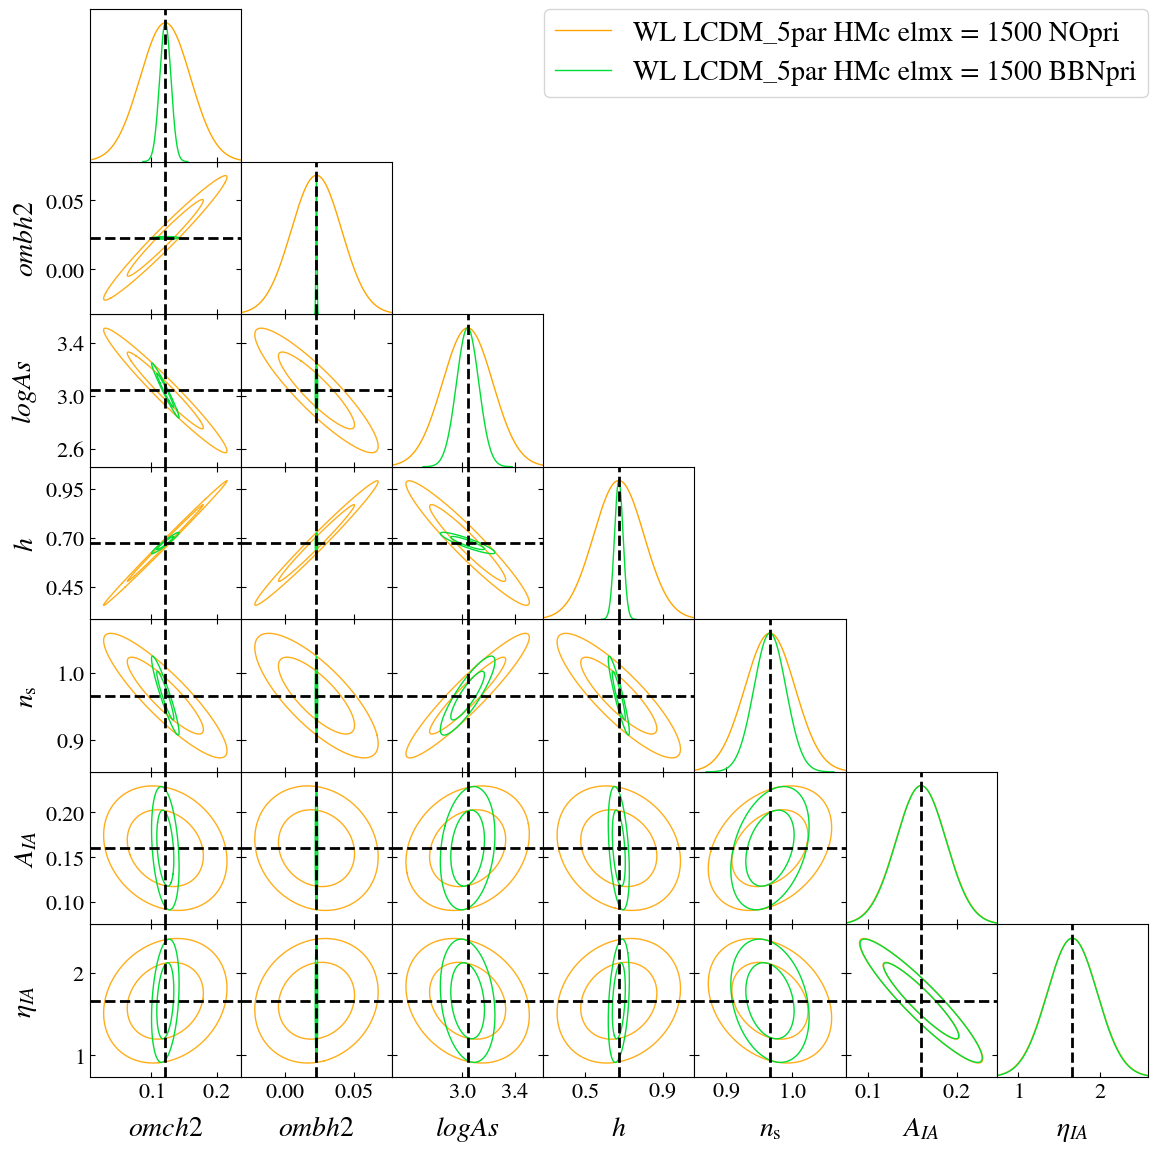

In [47]:
chooseind = [1,4]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmowlpars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_WL-BBNNopri'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=[False, False, False, False])

In [48]:
#fish_plotter.compare_errors({'colors': colorlist, 'ncol_legend':1, "y_lim":[-100,100]})